In [132]:
from __future__ import print_function
import torch
t_c= [0.5, 14.0, 15.0, 28.0 , 11.0, 8.0, 3.0 , -4.0, 6.0, 13.0 , 21.0]
t_u=[35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9 , 21.8, 48.4, 60.4, 68.4]

t_c=torch.tensor(t_c)
t_u=torch.tensor(t_u)
t_un= 0.1* t_u

In [133]:
def model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [134]:
def loss_fn(t_p, t_c):
    squared_diffs=(t_p - t_c) **2
    return squared_diffs.mean()

In [135]:

n_samples= t_u.shape[0]
n_val= int(0.2 * n_samples)

shuffled_indices= torch.randperm(n_samples)

train_indices= shuffled_indices[:-n_val]
val_indices= shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 3,  5, 10,  0,  6,  9,  1,  2,  8]), tensor([4, 7]))

In [136]:
train_t_u= t_u[train_indices]
train_t_c=t_c[train_indices]

val_t_u= t_u[val_indices]
val_t_c= t_c[val_indices]

train_t_un= 0.1 * train_t_u
val_t_un= 0.1 * val_t_u
train_t_u

tensor([81.9000, 48.9000, 68.4000, 35.7000, 33.9000, 60.4000, 55.9000, 58.2000,
        48.4000])

In [137]:
train_t_c

tensor([28.0000,  8.0000, 21.0000,  0.5000,  3.0000, 13.0000, 14.0000, 15.0000,
         6.0000])

In [138]:
val_t_u

tensor([56.3000, 21.8000])

In [139]:
val_t_c

tensor([11., -4.])

In [140]:
val_indices

tensor([4, 7])

In [141]:
train_indices

tensor([ 3,  5, 10,  0,  6,  9,  1,  2,  8])

In [142]:

def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range (1, n_epochs +1):
        
        train_t_p=model(train_t_u, *params)
        train_loss= loss_fn(train_t_p, train_t_c)
        
        val_t_p=model(val_t_u, *params)
        val_loss=loss_fn(val_t_p,val_t_c)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <=3 or epoch % 500 ==0:
       
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, "
                  f" Validation loss {val_loss.item():.4f}")
            
    return params

In [143]:
import torch.optim as optim
params=torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate=1e-1
optimizer= optim.SGD([params], lr=learning_rate)

training_loop( n_epochs=3000, optimizer=optimizer,params=params, train_t_u= train_t_un,
              val_t_u=val_t_un,train_t_c=train_t_c, val_t_c= val_t_c)

Epoch 1, Training loss 735.6794,  Validation loss 406.3116
Epoch 2, Training loss 49815440.0000,  Validation loss 20098298.0000
Epoch 3, Training loss 3421459185664.0000,  Validation loss 1381618024448.0000
Epoch 500, Training loss nan,  Validation loss nan
Epoch 1000, Training loss nan,  Validation loss nan
Epoch 1500, Training loss nan,  Validation loss nan
Epoch 2000, Training loss nan,  Validation loss nan
Epoch 2500, Training loss nan,  Validation loss nan
Epoch 3000, Training loss nan,  Validation loss nan


tensor([nan, nan, nan], requires_grad=True)

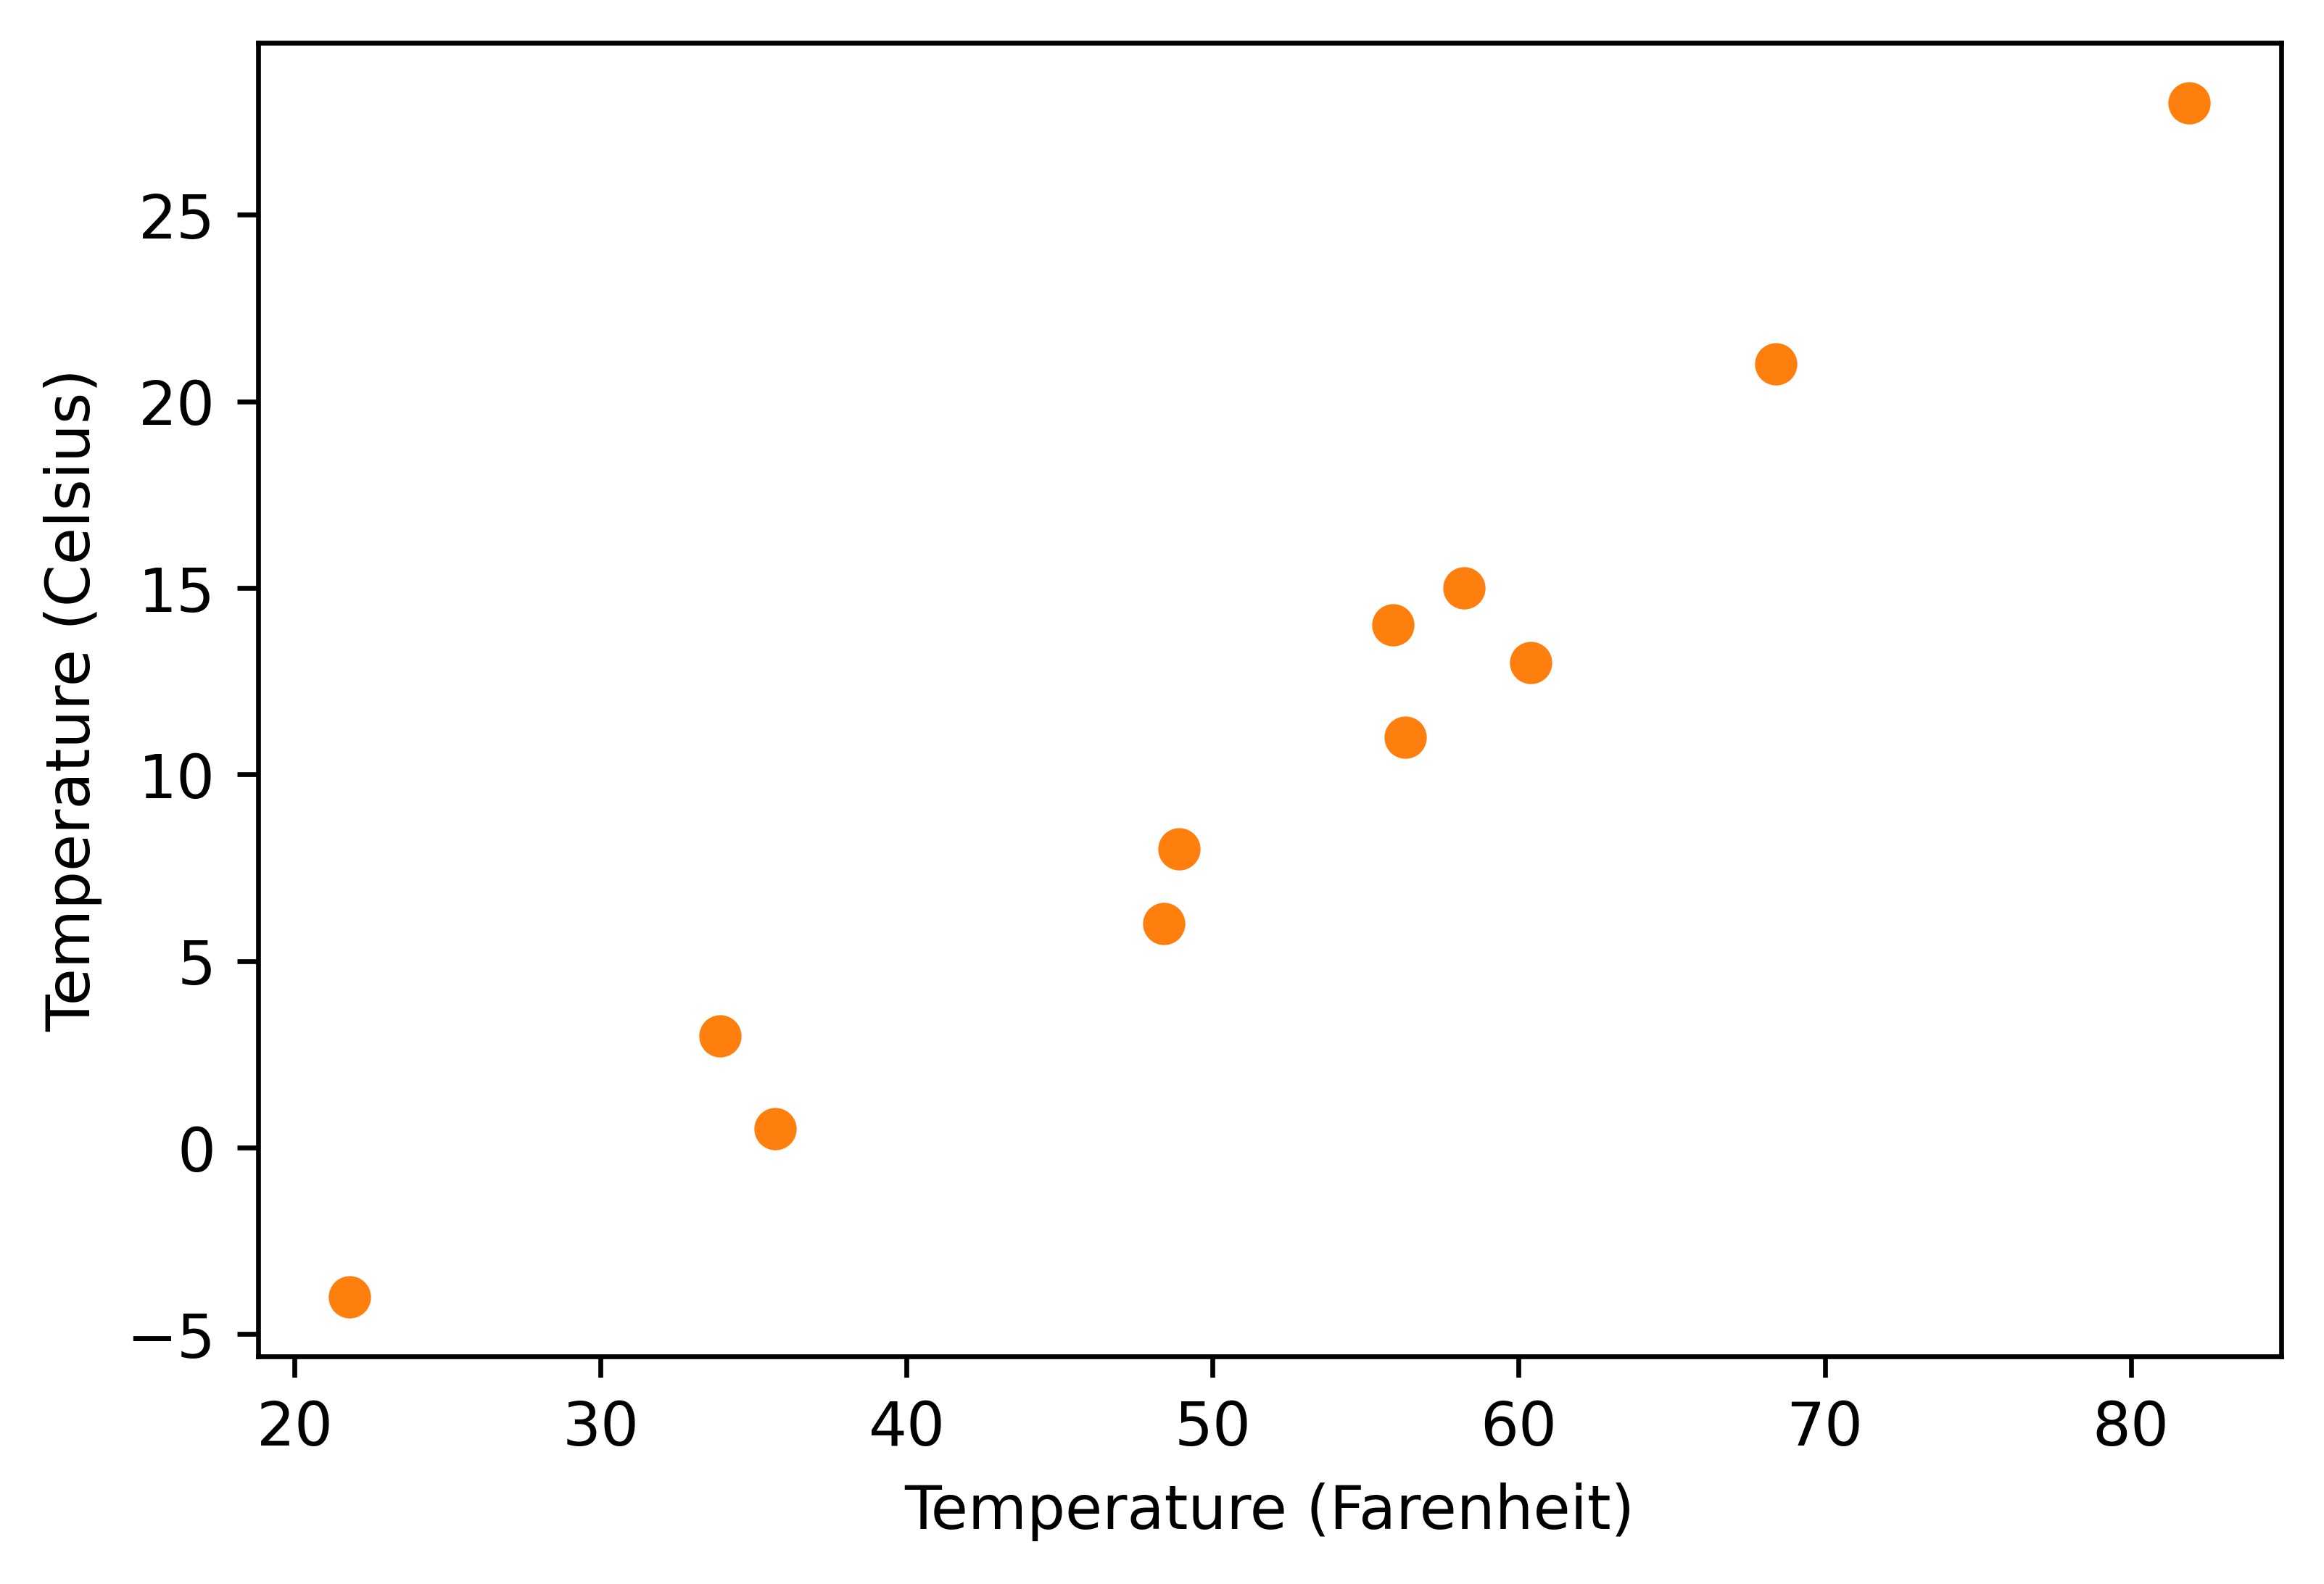

In [144]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p=model(t_un, *params)

fig=plt.figure(dpi=600)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [145]:
import torch.optim as optim
params=torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate=1e-2
optimizer= optim.SGD([params], lr=learning_rate)

training_loop( n_epochs=3000, optimizer=optimizer,params=params, train_t_u= train_t_un,
              val_t_u=val_t_un,train_t_c=train_t_c, val_t_c= val_t_c)

Epoch 1, Training loss 735.6794,  Validation loss 406.3116
Epoch 2, Training loss 464537.0000,  Validation loss 185507.8906
Epoch 3, Training loss 297512768.0000,  Validation loss 120190248.0000
Epoch 500, Training loss nan,  Validation loss nan
Epoch 1000, Training loss nan,  Validation loss nan
Epoch 1500, Training loss nan,  Validation loss nan
Epoch 2000, Training loss nan,  Validation loss nan
Epoch 2500, Training loss nan,  Validation loss nan
Epoch 3000, Training loss nan,  Validation loss nan


tensor([nan, nan, nan], requires_grad=True)

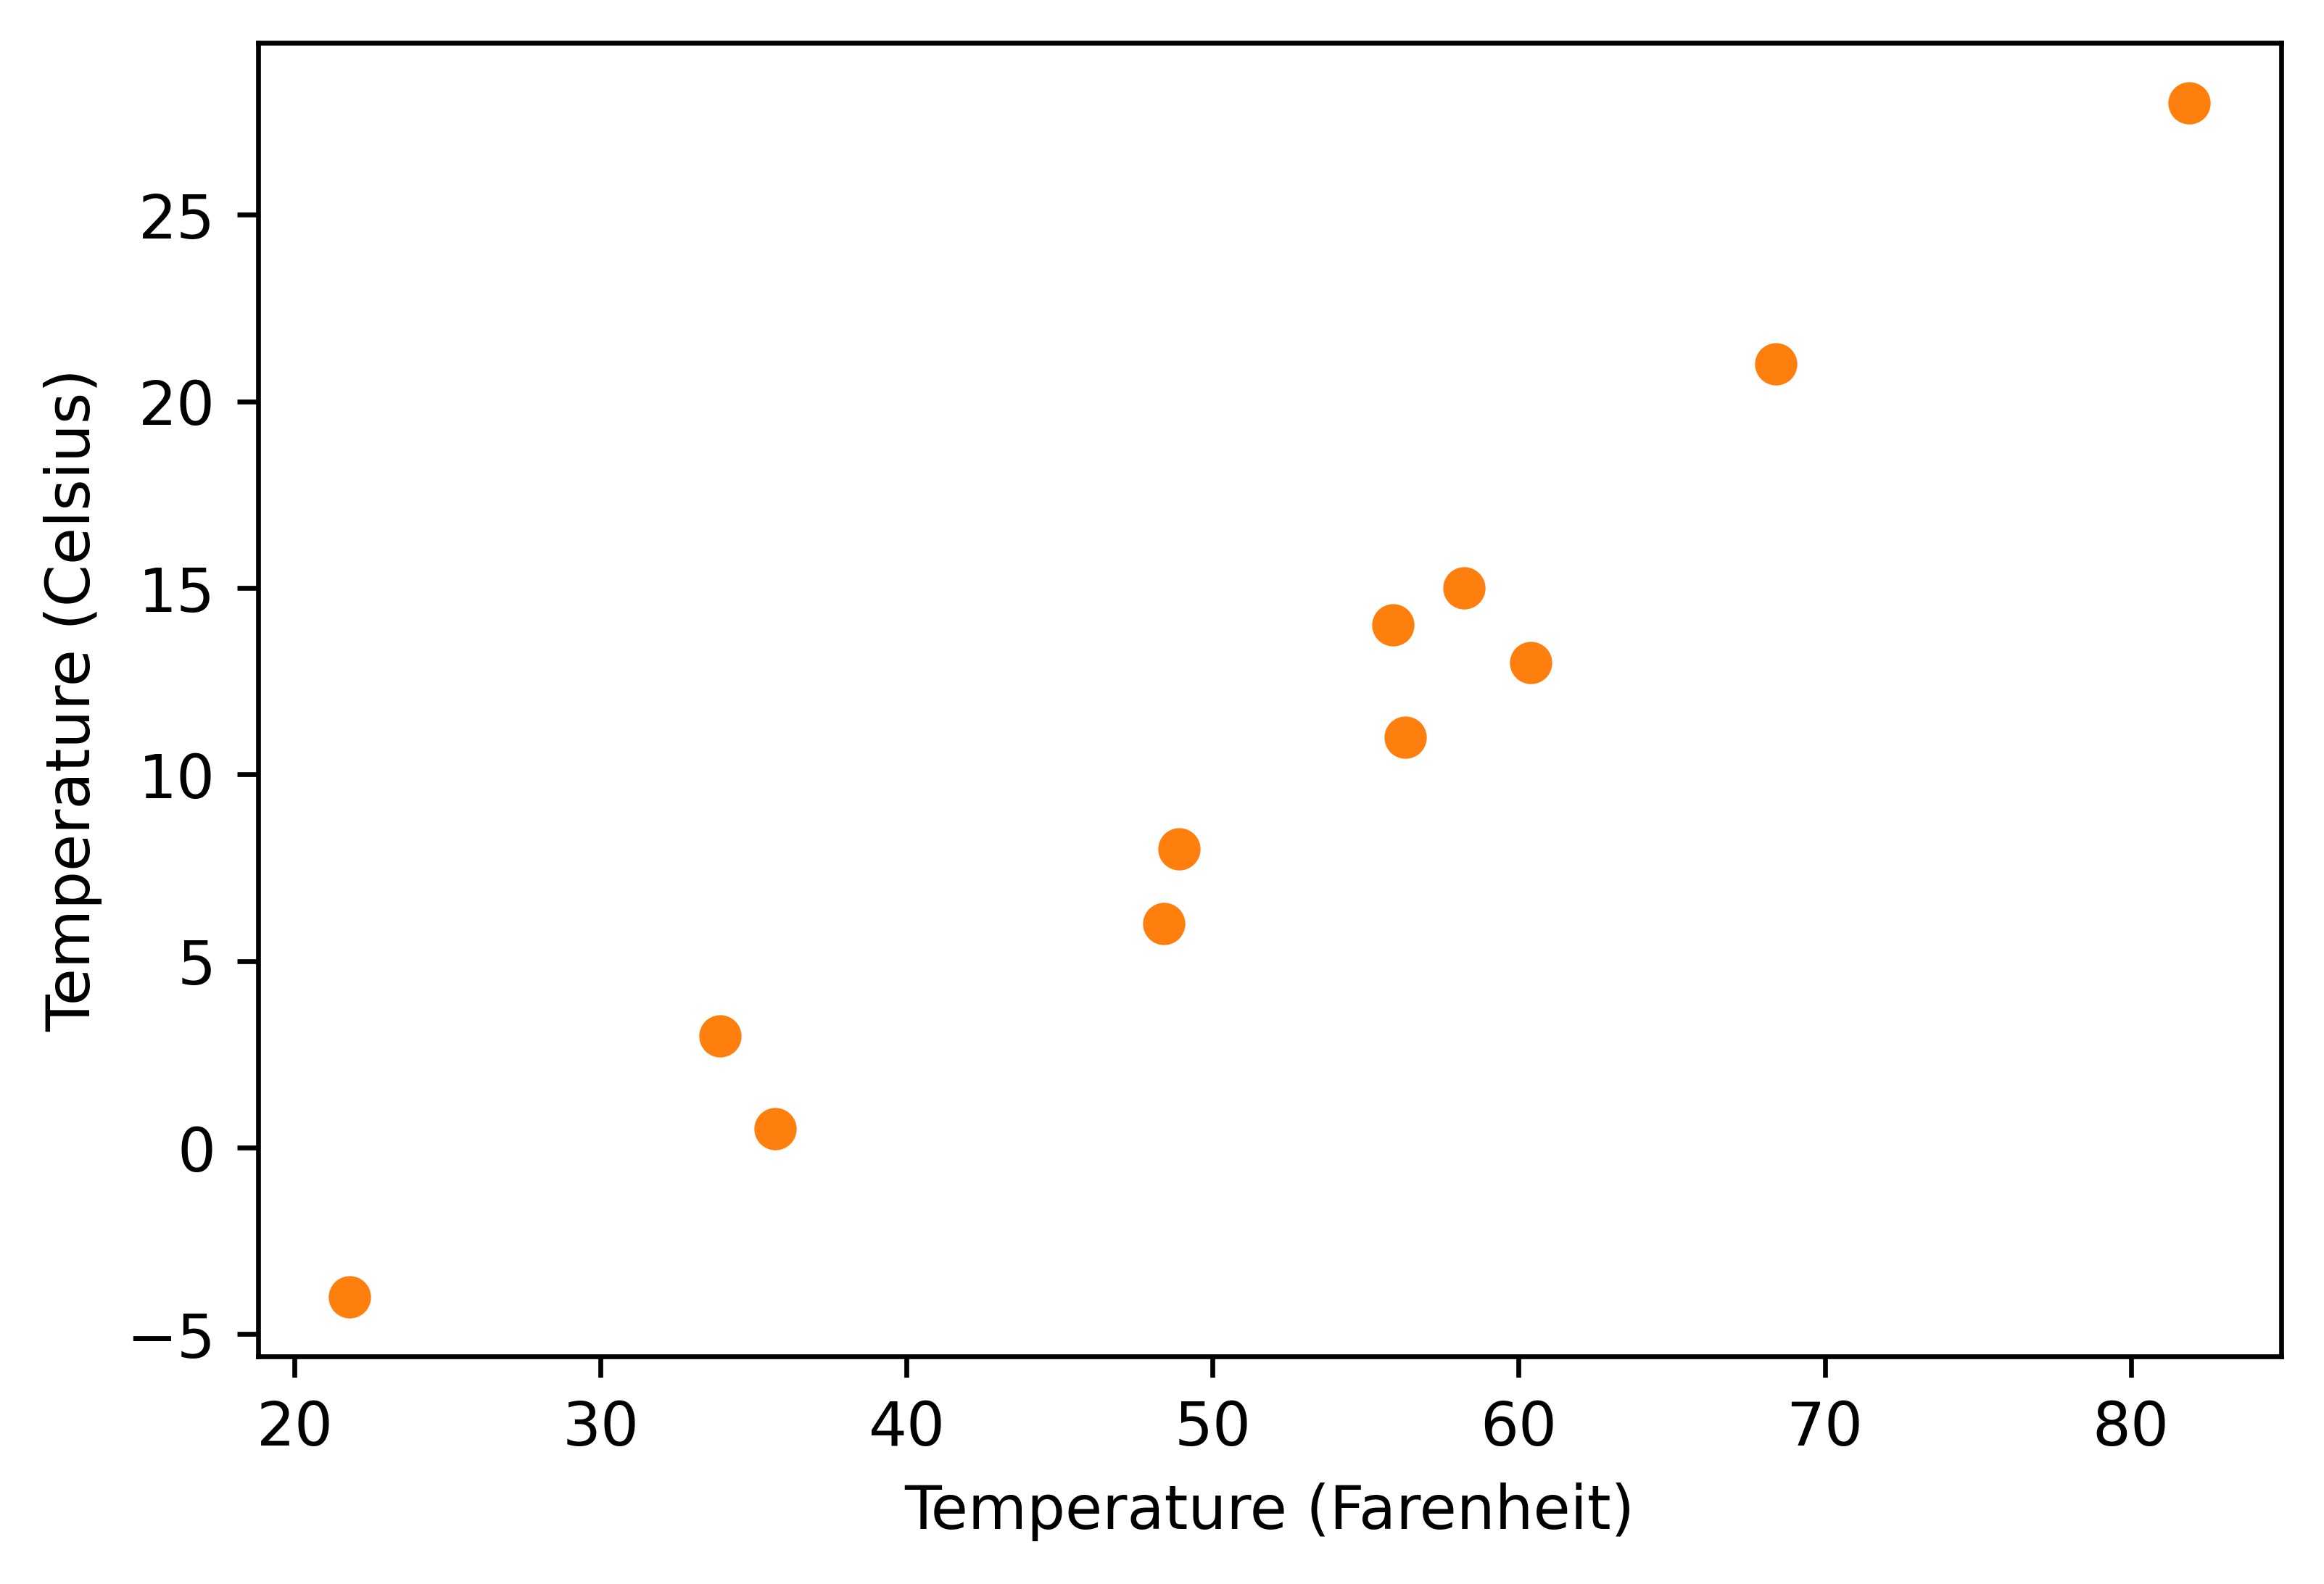

In [146]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p=model(t_un, *params)

fig=plt.figure(dpi=600)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [147]:
import torch.optim as optim
params=torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate=1e-3
optimizer= optim.SGD([params], lr=learning_rate)

training_loop( n_epochs=3000, optimizer=optimizer,params=params, train_t_u= train_t_un,
              val_t_u=val_t_un,train_t_c=train_t_c, val_t_c= val_t_c)

Epoch 1, Training loss 735.6794,  Validation loss 406.3116
Epoch 2, Training loss 1939.1224,  Validation loss 669.5908
Epoch 3, Training loss 5139.5347,  Validation loss 2324.1270
Epoch 500, Training loss nan,  Validation loss nan
Epoch 1000, Training loss nan,  Validation loss nan
Epoch 1500, Training loss nan,  Validation loss nan
Epoch 2000, Training loss nan,  Validation loss nan
Epoch 2500, Training loss nan,  Validation loss nan
Epoch 3000, Training loss nan,  Validation loss nan


tensor([nan, nan, nan], requires_grad=True)

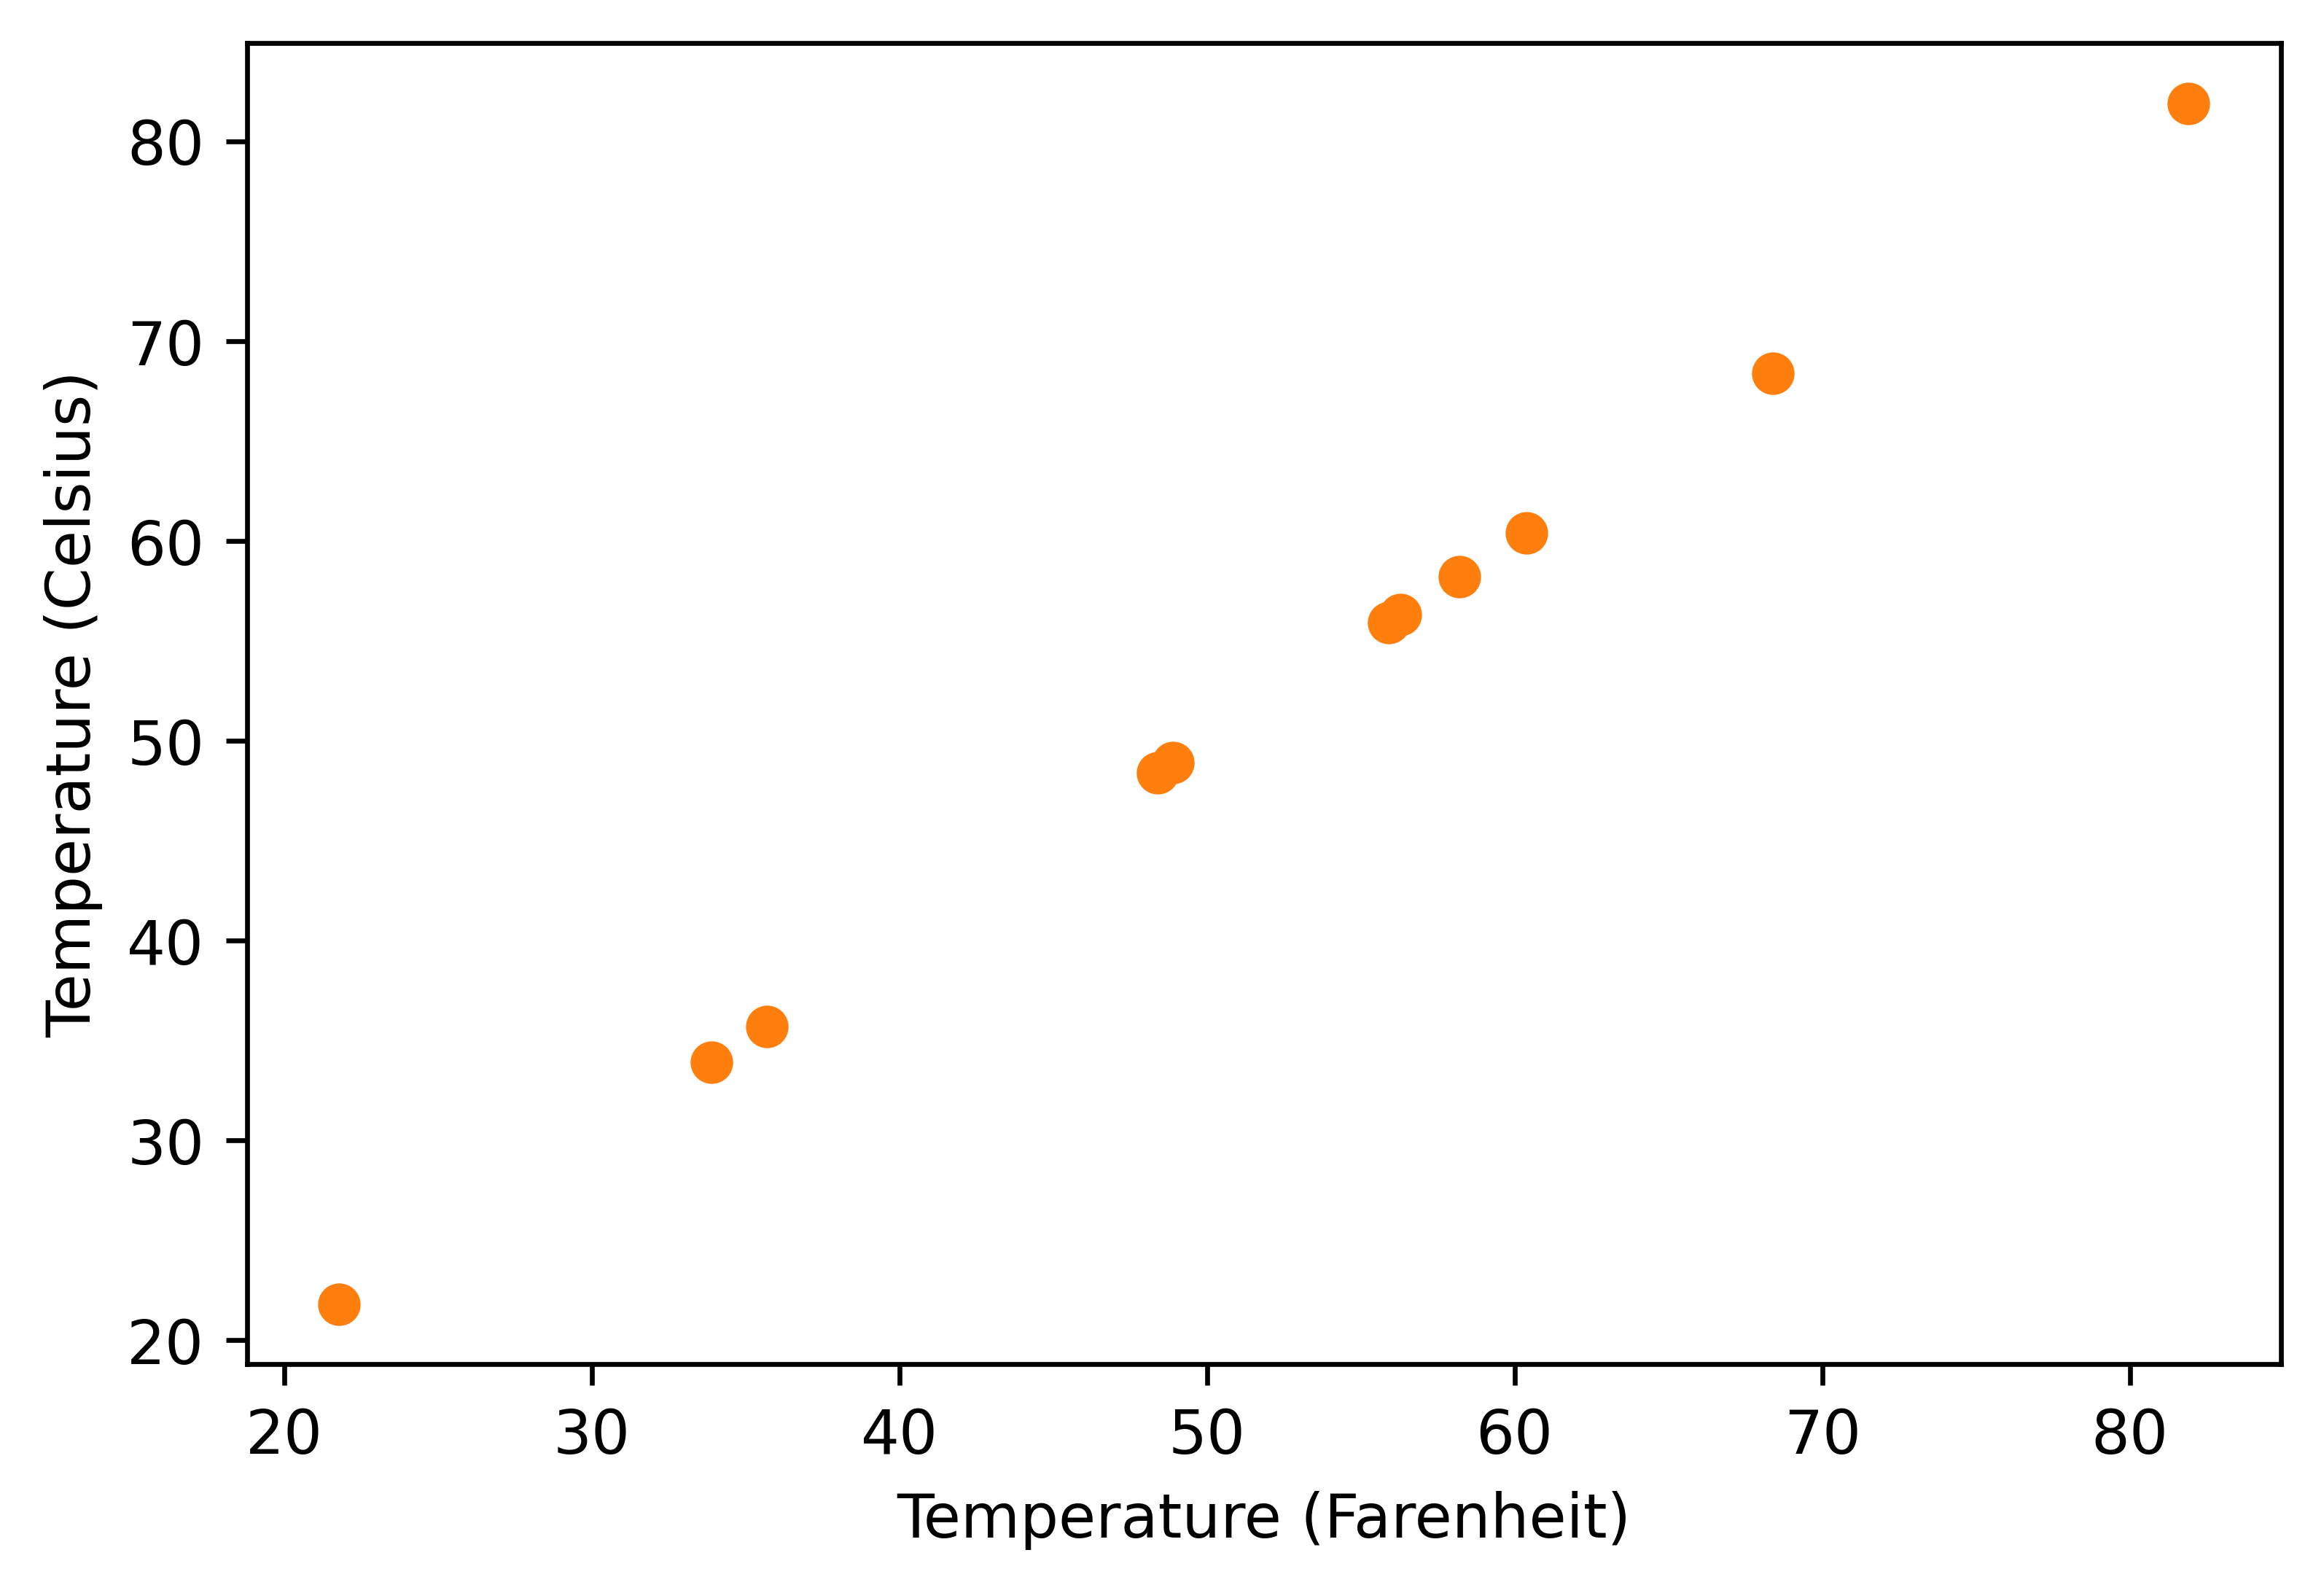

In [148]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p=model(t_un, *params)

fig=plt.figure(dpi=600)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_u.numpy(), 'o')

In [149]:
import torch.optim as optim
params=torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate=1e-4
optimizer= optim.SGD([params], lr=learning_rate)

training_loop( n_epochs=3000, optimizer=optimizer,params=params, train_t_u= train_t_un,
              val_t_u=val_t_un,train_t_c=train_t_c, val_t_c= val_t_c)

Epoch 1, Training loss 735.6794,  Validation loss 406.3116
Epoch 2, Training loss 404.2569,  Validation loss 250.1707
Epoch 3, Training loss 224.2721,  Validation loss 161.0522
Epoch 500, Training loss 8.2350,  Validation loss 24.4010
Epoch 1000, Training loss 6.7104,  Validation loss 21.0439
Epoch 1500, Training loss 5.6301,  Validation loss 18.4121
Epoch 2000, Training loss 4.8645,  Validation loss 16.3340
Epoch 2500, Training loss 4.3219,  Validation loss 14.6817
Epoch 3000, Training loss 3.9373,  Validation loss 13.3593


tensor([ 0.4670, -0.3385, -0.5039], requires_grad=True)

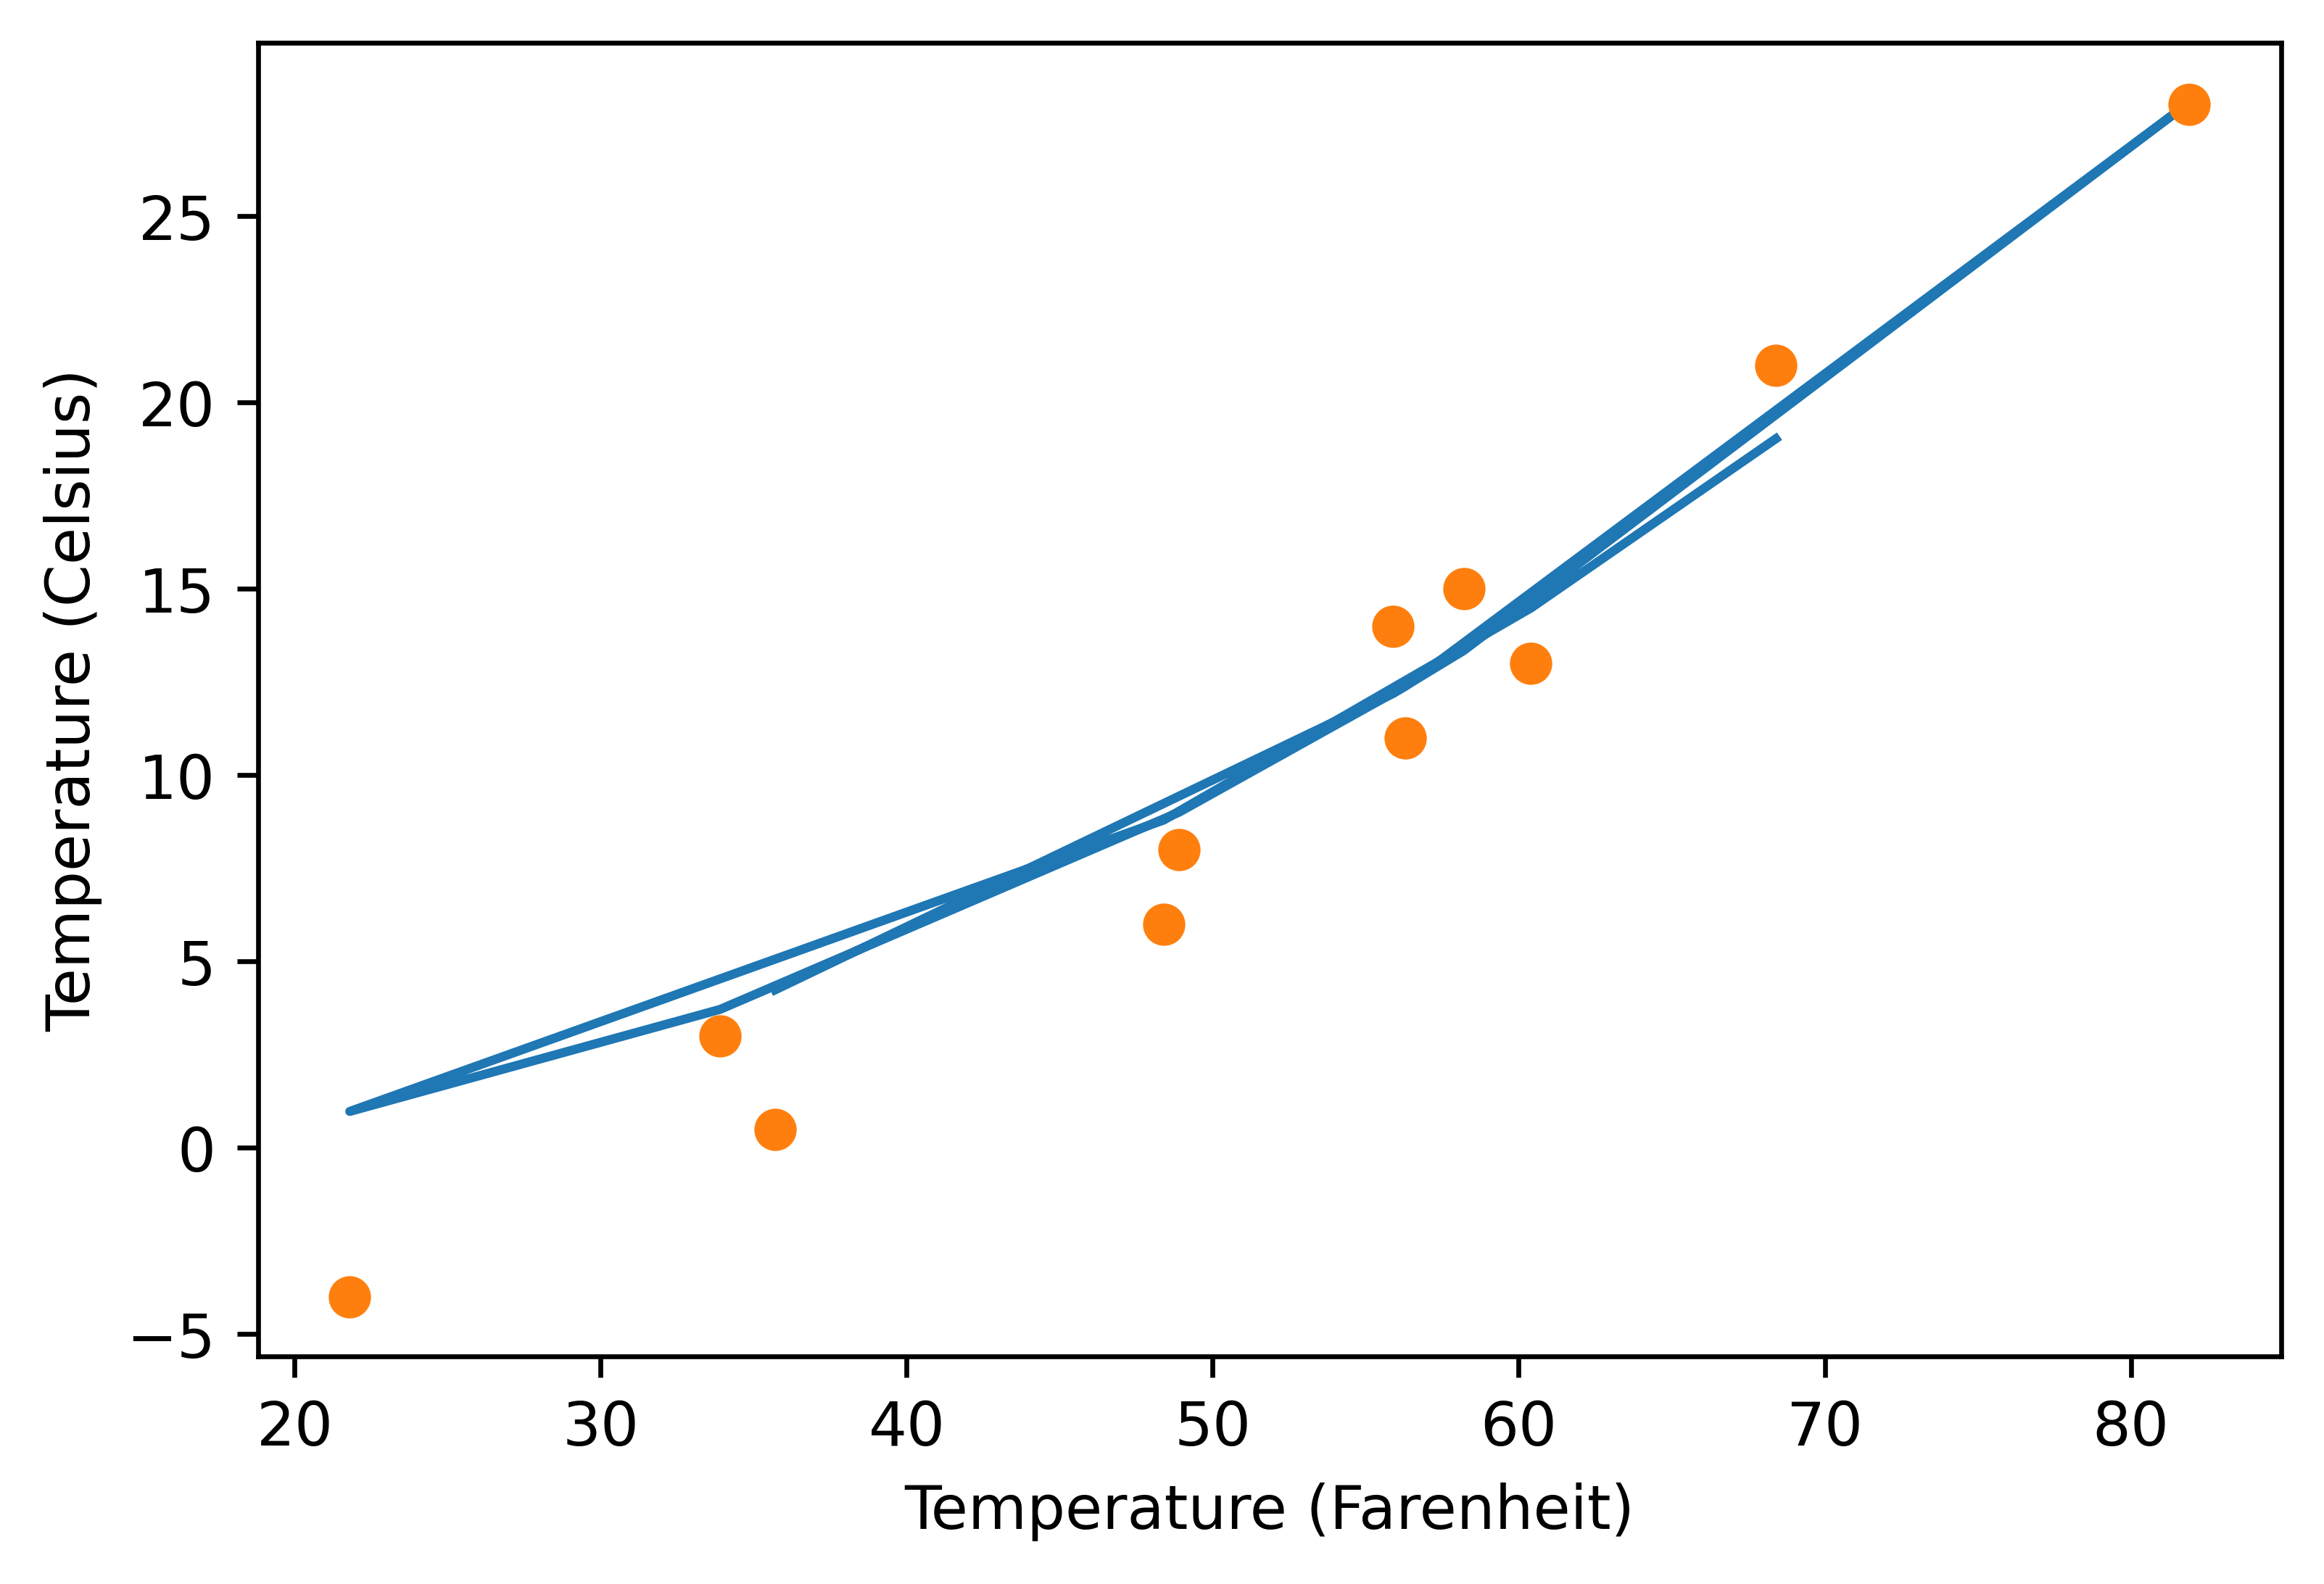

In [150]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p=model(t_un, *params)

fig=plt.figure(dpi=600)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(),t_c.numpy(), 'o')

In [151]:
import torch.optim as optim
params=torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate=1e-5
optimizer= optim.SGD([params], lr=learning_rate)

training_loop( n_epochs=3000, optimizer=optimizer,params=params, train_t_u= train_t_un,
              val_t_u=val_t_un,train_t_c=train_t_c, val_t_c= val_t_c)

Epoch 1, Training loss 735.6794,  Validation loss 406.3116
Epoch 2, Training loss 698.0194,  Validation loss 388.8727
Epoch 3, Training loss 662.3149,  Validation loss 372.2823
Epoch 500, Training loss 10.1322,  Validation loss 28.2238
Epoch 1000, Training loss 9.8908,  Validation loss 27.7536
Epoch 1500, Training loss 9.6576,  Validation loss 27.2954
Epoch 2000, Training loss 9.4323,  Validation loss 26.8488
Epoch 2500, Training loss 9.2147,  Validation loss 26.4135
Epoch 3000, Training loss 9.0044,  Validation loss 25.9891


tensor([ 0.2969,  0.6997, -0.0906], requires_grad=True)

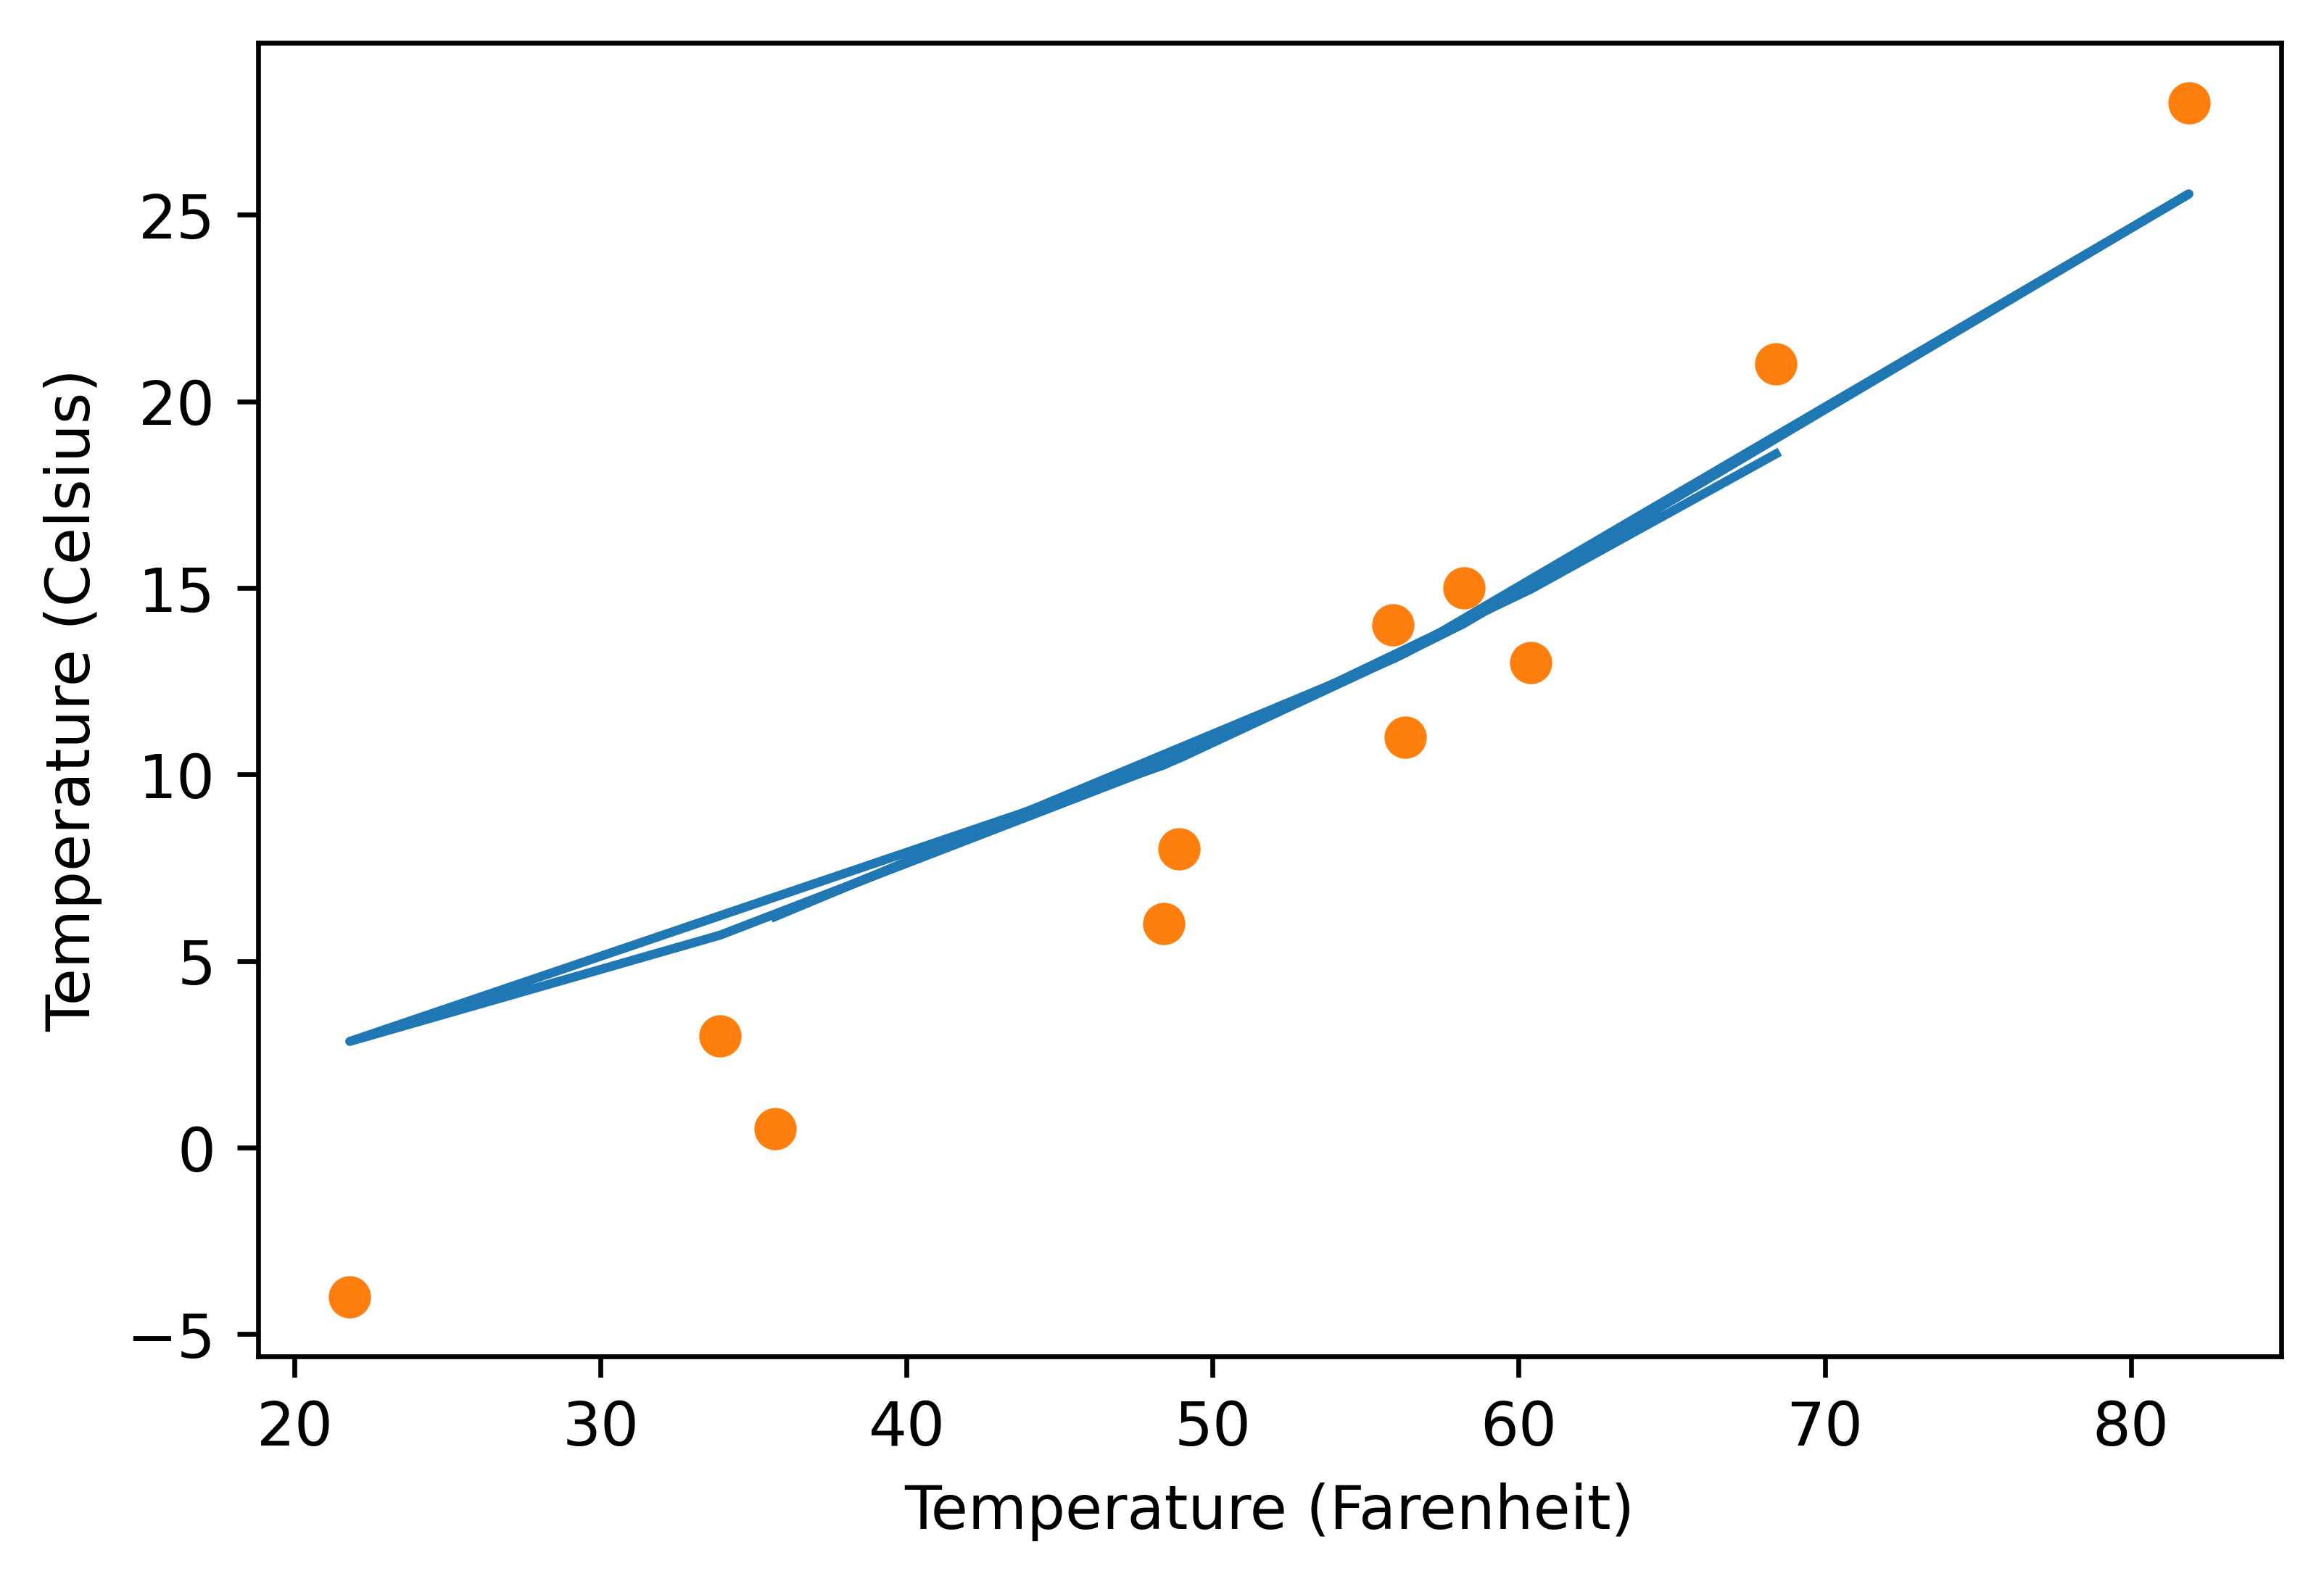

In [152]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p=model(t_un, *params)

fig=plt.figure(dpi=600)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [153]:
#autograd
def model_linear(t_u, w,b):
    return w * t_u + b

In [154]:
def loss_fn(t_p, t_c):
    squared_diffs=(t_p - t_c) **2
    return squared_diffs.mean()

In [155]:
def training_loop2(n_epochs, optimizer, params_lin, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs +1):
        train_t_p= model_linear(train_t_u, *params_lin)
        train_loss= loss_fn(train_t_p, train_t_c)
        
        with torch.no_grad():
            val_t_p=model_linear(val_t_u, *params_lin)
            val_loss= loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad==False
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <=3 or epoch% 500 ==0:
       
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, "
                  f" Validation loss {val_loss.item():.4f}")
        
    return params_lin


In [156]:
params_lin=torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate=1e-2
optimizer= optim.SGD([params_lin], lr=learning_rate)

training_loop2( n_epochs=3000, optimizer=optimizer,params_lin=params_lin, train_t_u= train_t_un,
              val_t_u=val_t_un,train_t_c=train_t_c, val_t_c= val_t_c)

Epoch 1, Training loss 90.7754,  Validation loss 33.5146
Epoch 2, Training loss 33.7982,  Validation loss 34.4394
Epoch 3, Training loss 27.0283,  Validation loss 42.0913
Epoch 500, Training loss 9.4831,  Validation loss 10.2596
Epoch 1000, Training loss 4.6468,  Validation loss 2.7845
Epoch 1500, Training loss 3.2565,  Validation loss 2.4603
Epoch 2000, Training loss 2.8569,  Validation loss 3.3453
Epoch 2500, Training loss 2.7420,  Validation loss 4.1242
Epoch 3000, Training loss 2.7090,  Validation loss 4.6294


tensor([  5.5929, -18.4719], requires_grad=True)

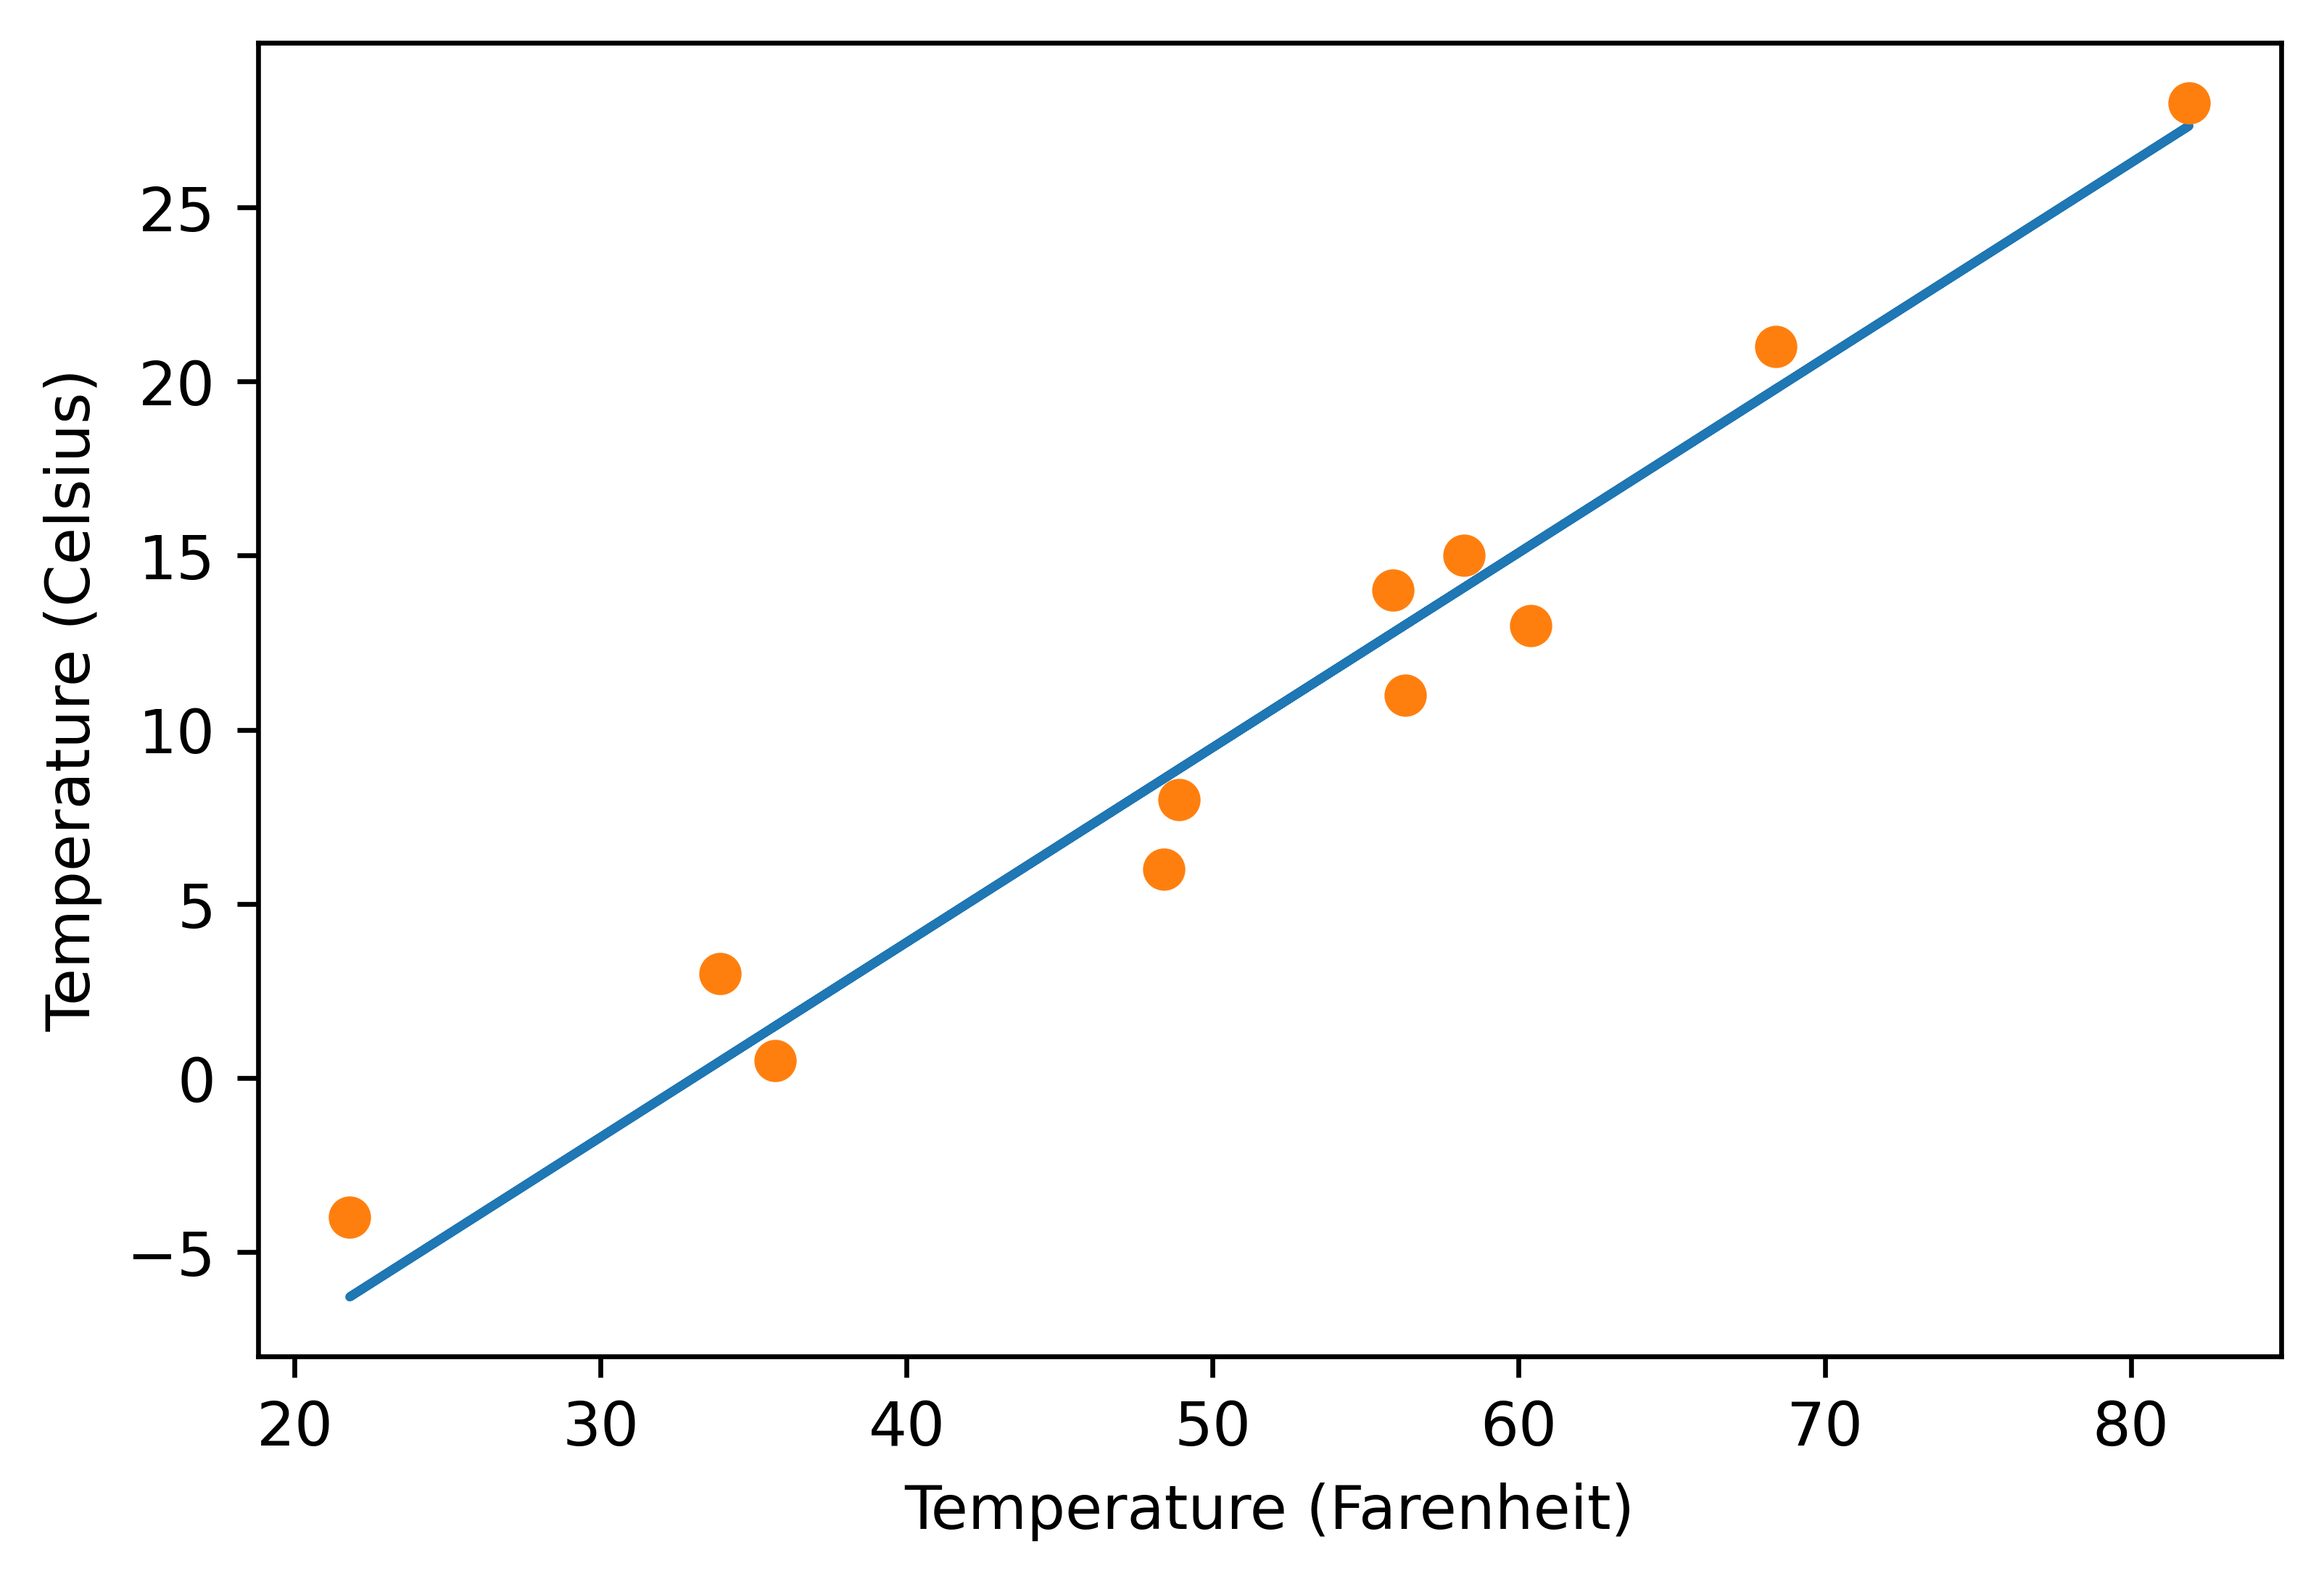

In [157]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p=model_linear(t_un, *params_lin)


fig=plt.figure(dpi=600)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

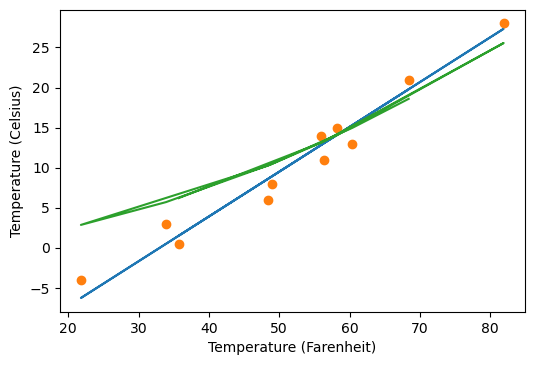

In [160]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p=model_linear(t_un, *params_lin)
t_p2=model(t_un, *params)

fig=plt.figure(dpi=100)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_u.numpy(), t_p2.detach().numpy())
